Project Root Directory: c:\Users\86136\Desktop\stock_prediction_lstm
config.py Exists: True
src/data_generator.py Exists: True
Project Root Directory: C:\Users\86136\Desktop\stock_prediction_lstm
config.py Exists: True
src/data_generator.py Exists: True

Generating simulated stock data...
Adding technical indicators...
✅ 数据已保存到: data/stock_data.csv
📊 数据形状: (2162, 15)
📅 日期范围: 2020-01-01 00:00:00 到 2025-12-01 00:00:00
Generating visualization charts...


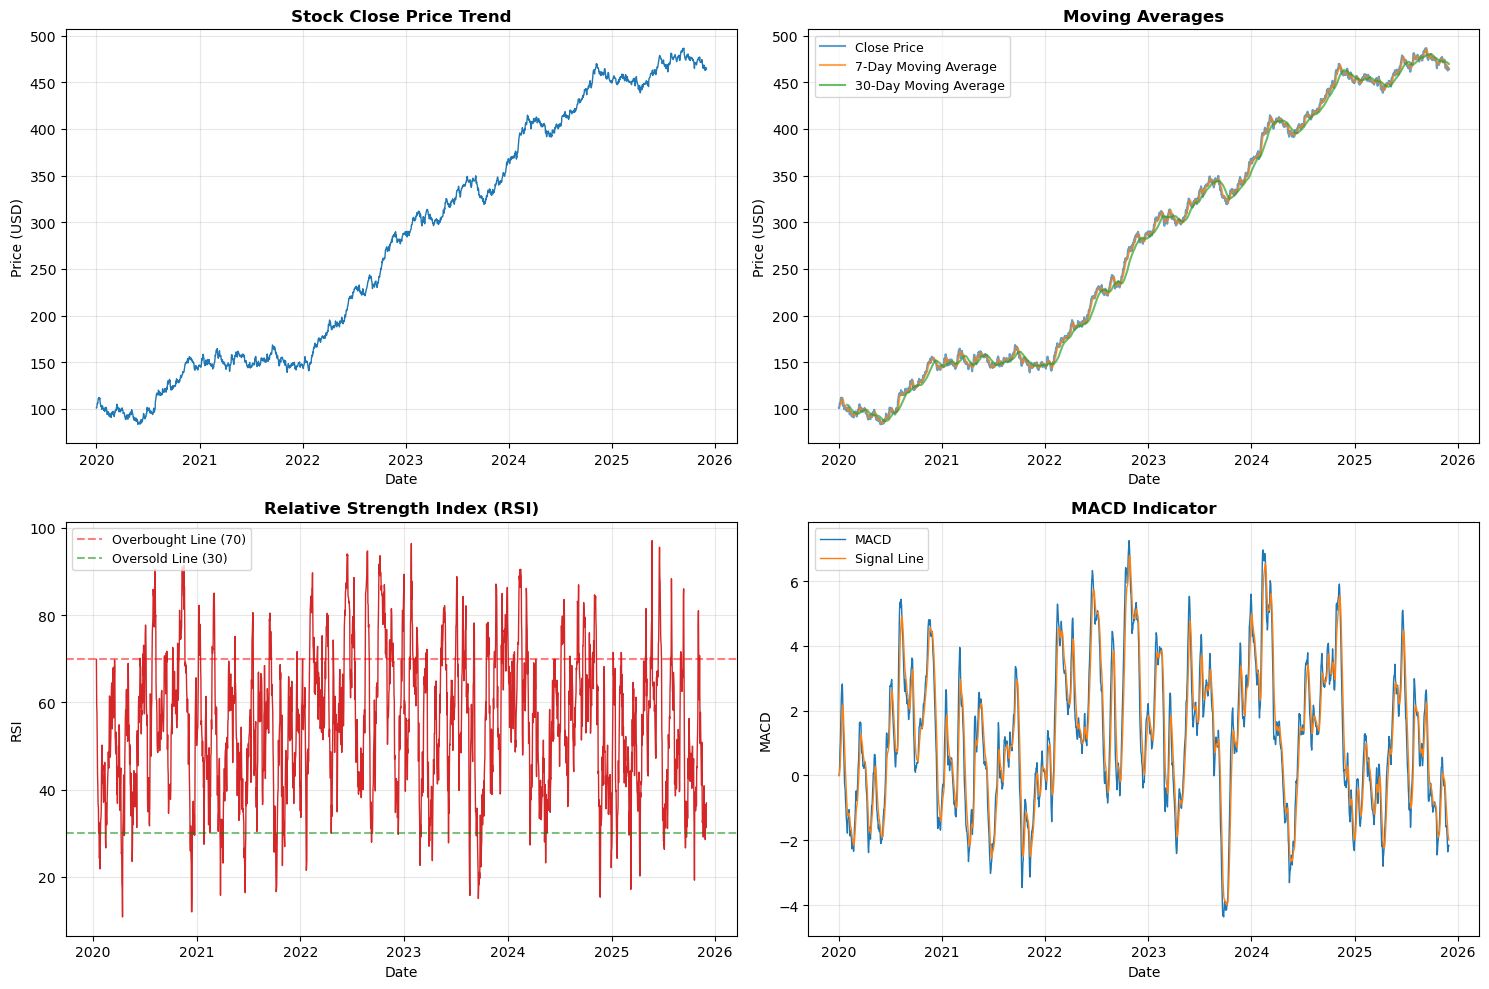


Simulated Stock Data Statistics:
              Open         High          Low        Close        Volume
count  2162.000000  2162.000000  2162.000000  2162.000000  2.162000e+03
mean    278.147191   283.791434   272.586066   278.237516  5.612595e+06
std     132.482747   135.214755   129.857745   132.579239  2.599396e+06
min      83.124588    85.566490    81.216673    83.364087  1.014859e+06
25%     150.101869   153.157550   146.849503   149.809762  3.410629e+06
50%     287.063358   291.531602   280.131245   285.844256  5.695740e+06
75%     408.378078   416.080204   400.823611   408.329381  7.842914e+06
max     490.646662   499.549788   477.020976   486.565853  1.027187e+07

Total Trading Days: 2162

Data generation completed! CSV File Path: data/stock_data.csv
Visualization Chart Path: c:\Users\86136\Desktop\stock_prediction_lstm\static\images\data_exploration.png


In [1]:
import sys
import os

# ========== Core: Fix Python module search path ==========
# Get absolute path of current notebooks folder
notebooks_dir = os.getcwd()
# Get project root directory (parent of notebooks folder)
project_root = os.path.dirname(notebooks_dir)
# Add project root to Python module search path (key: let Jupyter find config and src)
sys.path.append(project_root)

# Verify path configuration (check output after running)
print(f"Project Root Directory: {project_root}")
print(f"config.py Exists: {os.path.exists(os.path.join(project_root, 'config.py'))}")
print(f"src/data_generator.py Exists: {os.path.exists(os.path.join(project_root, 'src', 'data_generator.py'))}")

# ========== Import project modules and dependencies ==========
from config import Config
from src.data_generator import StockDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ========== Initialize data generator ==========
generator = StockDataGenerator(
    initial_price=Config.INITIAL_PRICE,
    trend_slope=Config.TREND_SLOPE,
    volatility=Config.VOLATILITY
)

# ========== Generate simulated stock data ==========
print("\nGenerating simulated stock data...")
stock_data = generator.generate_stock_data(
    start_date=Config.START_DATE,
    end_date=Config.END_DATE,
    symbol=Config.STOCK_SYMBOL
)

# ========== Add technical indicators (MA7/RSI/MACD etc.) to data ==========
print("Adding technical indicators...")
stock_data_with_indicators = generator.add_technical_indicators(stock_data)

# ========== Save data to local CSV file ==========
# Ensure data directory exists (avoid save failure)
os.makedirs(os.path.dirname(Config.DATA_PATH), exist_ok=True)
# Save data
generator.save_to_csv(stock_data_with_indicators, Config.DATA_PATH)

# ========== Visualize stock data and technical indicators ==========
print("Generating visualization charts...")
# Ensure static/images directory exists (avoid save image failure)
plot_save_path = os.path.join(project_root, "static", "images")
os.makedirs(plot_save_path, exist_ok=True)

# Create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Subplot 1: Stock close price trend
axes[0, 0].plot(stock_data_with_indicators['Date'], stock_data_with_indicators['Close'], linewidth=1, color='#1f77b4')
axes[0, 0].set_title('Stock Close Price Trend', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Date', fontsize=10)
axes[0, 0].set_ylabel('Price (USD)', fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# 2. Subplot 2: Moving Averages (7-day/30-day)
axes[0, 1].plot(stock_data_with_indicators['Date'], stock_data_with_indicators['Close'], label='Close Price', alpha=0.7, color='#1f77b4')
axes[0, 1].plot(stock_data_with_indicators['Date'], stock_data_with_indicators['MA7'], label='7-Day Moving Average', alpha=0.7, color='#ff7f0e')
axes[0, 1].plot(stock_data_with_indicators['Date'], stock_data_with_indicators['MA30'], label='30-Day Moving Average', alpha=0.7, color='#2ca02c')
axes[0, 1].set_title('Moving Averages', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Date', fontsize=10)
axes[0, 1].set_ylabel('Price (USD)', fontsize=10)
axes[0, 1].legend(loc='upper left', fontsize=9)
axes[0, 1].grid(True, alpha=0.3)

# 3. Subplot 3: Relative Strength Index (RSI)
axes[1, 0].plot(stock_data_with_indicators['Date'], stock_data_with_indicators['RSI'], linewidth=1, color='#d62728')
axes[1, 0].axhline(y=70, color='r', linestyle='--', alpha=0.5, label='Overbought Line (70)')
axes[1, 0].axhline(y=30, color='g', linestyle='--', alpha=0.5, label='Oversold Line (30)')
axes[1, 0].set_title('Relative Strength Index (RSI)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Date', fontsize=10)
axes[1, 0].set_ylabel('RSI', fontsize=10)
axes[1, 0].legend(loc='upper left', fontsize=9)
axes[1, 0].grid(True, alpha=0.3)

# 4. Subplot 4: MACD Indicator
axes[1, 1].plot(stock_data_with_indicators['Date'], stock_data_with_indicators['MACD'], label='MACD', linewidth=1, color='#1f77b4')
axes[1, 1].plot(stock_data_with_indicators['Date'], stock_data_with_indicators['Signal_Line'], label='Signal Line', linewidth=1, color='#ff7f0e')
axes[1, 1].set_title('MACD Indicator', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Date', fontsize=10)
axes[1, 1].set_ylabel('MACD', fontsize=10)
axes[1, 1].legend(loc='upper left', fontsize=9)
axes[1, 1].grid(True, alpha=0.3)

# Adjust subplot spacing to avoid overlap
plt.tight_layout()
# Save chart to static/images directory
plt.savefig(os.path.join(plot_save_path, "data_exploration.png"), dpi=300, bbox_inches='tight')
# Display chart
plt.show()

# ========== Output data statistics ==========
print("\nSimulated Stock Data Statistics:")
print(stock_data_with_indicators[['Open', 'High', 'Low', 'Close', 'Volume']].describe())
print(f"\nTotal Trading Days: {len(stock_data_with_indicators)}")
print(f"\nData generation completed! CSV File Path: {Config.DATA_PATH}")
print(f"Visualization Chart Path: {os.path.join(plot_save_path, 'data_exploration.png')}")